<a href="https://colab.research.google.com/github/Gibsdevops/machine-learning-with-deep-learning-/blob/main/data_augmentation_cnn_cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#data downloading url

url ='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

In [43]:
#download the data

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=url, extract=True)

In [45]:
#verify
zip_dir

'/root/.keras/datasets/cats_and_dogs_filtered_extracted'

In [46]:
import pathlib

parent_folder = pathlib.Path(zip_dir).parent
list(parent_folder.iterdir())

[PosixPath('/root/.keras/datasets/cats_and_dogs_filtered_extracted'),
 PosixPath('/root/.keras/datasets/cats_and_dogs_filtered.zip')]

In [47]:
check_dir = pathlib.Path('/root/.keras/datasets/cats_and_dogs_filtered_extracted')
list(dir.iterdir())

[PosixPath('/root/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered')]

In [48]:
#meaning the exact folder path is this
data_dir = pathlib.Path('/root/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered')


list(data_dir.iterdir())

[PosixPath('/root/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/vectorize.py'),
 PosixPath('/root/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/train'),
 PosixPath('/root/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/validation')]

In [49]:
#assign variables with proper file path
base_dir = os.path.join(os.path.dirname(data_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [50]:
#main folder
base_dir

'/root/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered'

In [51]:
#training folder
train_dir

'/root/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/train'

In [36]:
#validation folder
validation_dir

'/root/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered/validation'

In [39]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [40]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [ ]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

In [52]:
#setting model paarmeters
batch_size= 100
img_shape = 150 #the training images should be 150 pixels height and 150 pixels width

DATA ARGUMENTATION

In [53]:
#data argumentation

#start by defining a function to display an image in the form of grid
# 1 row, and 5 columns
#images are placed in each column
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [54]:
#flipping the image horizontally

image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(img_shape, img_shape)
                                               )

Found 2000 images belonging to 2 classes.


In [ ]:
#sampling after rotation
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [56]:
#rotating the images  at 45 degrees
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(img_shape, img_shape))

Found 2000 images belonging to 2 classes.


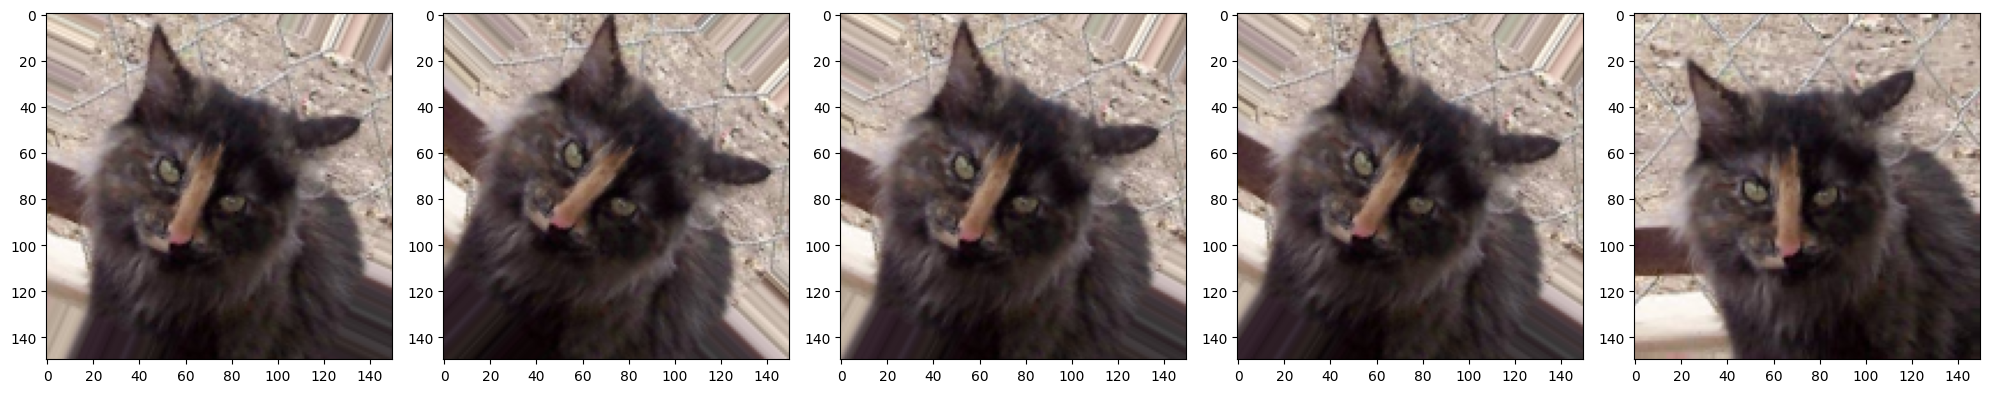

In [57]:
#sampling after rotating
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
#applying zoom, zooming images up to 50% randomly.

image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(img_shape, img_shape))


In [59]:
#sampling
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [60]:
#puttinng it all together

image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(img_shape, img_shape),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


how a single image would look like five different times


In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

creating the validation data generator


In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(img_shape, img_shape),
                                                 class_mode='binary')

model creation

The model consists of four convolution blocks with a max pool layer in each of them.

Before the final Dense layers, we're also applying a Dropout probability of 0.5. It means that 50% of the values coming into the Dropout layer will be set to zero. This helps to prevent overfitting.

Then we have a fully connected layer with 512 units, with a relu activation function. The model will output class probabilities for two classes — dogs and cats — using softmax.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [66]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
model.summary()

It's time we train our network.


In [ ]:
epochs=10
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(batch_size)))
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()